<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/DL_Dog_vs_Cat_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
#installing kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#configuring path of kaggle.json files
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset from kaggle

In [3]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:23<00:00, 41.5MB/s]
100% 812M/812M [00:23<00:00, 36.0MB/s]


In [4]:
#extracting compressed dataset
from zipfile import ZipFile
dataset = ['/content/dogs-vs-cats.zip', '/content/train.zip', '/content/test1.zip']

for data in dataset:
  with ZipFile(data, 'r') as zip:
  #mode = r ie read-only
    zip.extractall()
print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
#counting no of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing number of images

In [6]:
file_names = os.listdir('/content/train')
#print(file_names)

In [7]:
#getting count of dog and cat
dog_count = 0
cat_count = 0
for i in range(file_count):
  name = file_names[i][0:3]
  if name == 'dog':
    dog_count += 1
  if name == 'cat':
    cat_count += 1

print(dog_count)
print(cat_count)

12500
12500


Importing the Dependencies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of cats and dogs

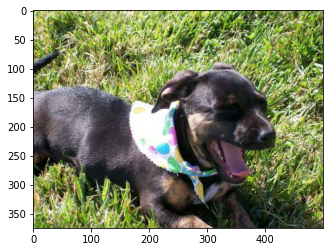

In [9]:
#display dog image
img = mpimg.imread('/content/train/dog.8316.jpg')
img = plt.imshow(img)
#plt.show()

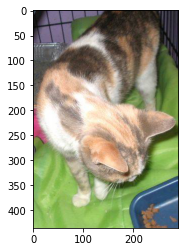

In [10]:
#display cat image
img = mpimg.imread('/content/train/cat.2211.jpg')
img = plt.imshow(img)
#plt.show()

Resizing all the images

In [11]:

#creating directory for resied images
try:
  os.mkdir('/content/image_resized')
except:
  pass

In [12]:
#from tables import file
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

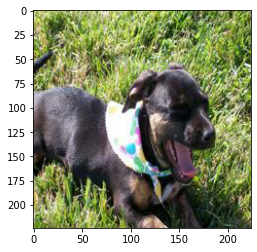

In [13]:
img = mpimg.imread('/content/image_resized/dog.8316.jpg')
imgplt = plt.imshow(img)

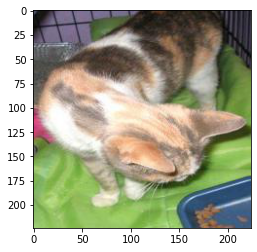

In [14]:
img = mpimg.imread('/content/image_resized/cat.2211.jpg')
img = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cats -> 0
Dogs -> 1


In [15]:
#Assigning labels
file_names = os.listdir('/content/image_resized')
print(type(file_names))
labels = []

for i in range(2000):
  label = file_names[i][0:3]
  if label == 'dog':
    labels.append(1)
  elif label == 'cat':
    labels.append(0)

<class 'list'>


In [34]:
#print(file_names)
#print(labels)

In [17]:
#counting images of dogs ans cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1011  989]


Convert all resized images to numpy arrays

In [18]:
import cv2
import glob

In [19]:
image_directory = '/content/image_resized/'
  #dont forget to mention '/' at the end above
print(image_directory)
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

/content/image_resized/


In [20]:
#print(dog_cat_images)

In [21]:
print(dog_cat_images.shape)


(2000, 224, 224, 3)


In [22]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [24]:
print(X.shape, X_test.shape, X_train.shape)

(2000, 224, 224, 3) (400, 224, 224, 3) (1600, 224, 224, 3)


In [25]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
#print(X_train_scaled)

#Building Neural Network

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [29]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
  )

In [31]:
model.fit(X_train_scaled, Y_train, epochs = 5 )

Epoch 1/5
50/50 [==============================] - 76s 1s/step - loss: 0.2052 - accuracy: 0.9212
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0774 - accuracy: 0.9769
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0589 - accuracy: 0.9837
Epoch 4/5
50/50 [==============================] - 61s 1s/step - loss: 0.0490 - accuracy: 0.9869
Epoch 5/5
50/50 [==============================] - 59s 1s/step - loss: 0.0448 - accuracy: 0.9869


In [32]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss is ', score)
print('Test Accuracy is ', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0677 - accuracy: 0.9700
Test loss is  0.06771698594093323
Test Accuracy is  0.9700000286102295



#Predictive System

Path of image to be predicted: /content/istockphoto-1402891368-170667a.jpg


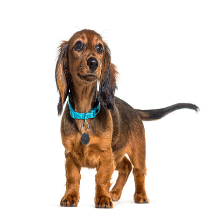

1/1 [==============================] - 1s 790ms/step
[[-1.9950595  2.6446528]]
yay! the dog is here!


In [33]:
input_image_path = input('Path of image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_resize = cv2.resize(input_image, (224, 224))
cv2_imshow(input_image_resize)
input_image_scaled = input_image_resize / 255
input_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
  #1 here signified that only 1 image is being checked
input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('it is cat! meow!')
else:
  print('yay! the dog is here!')